In [1]:
%run correlate_evolution.ipynb

%cd /work/clusterEvo/new_tests/noise/

/work/clusterEvo/new_tests/noise


In [2]:
import multiprocessing
import itertools
import pandas as pd
import plotly
from scipy.stats import pearsonr, spearmanr

In [3]:
alignment_file_names = [f'alignments/tree_{_}' for _ in range(1, 51)]

pool                = multiprocessing.Pool(processes = 10)
noisy_dist_matrices = pool.map(run_dist_matrix, alignment_file_names)

In [4]:
alignment_file_names = [ete3.Tree(f'alignments/tree_{_}.treefile') for _ in range(1, 51)]

pool               = multiprocessing.Pool(processes = 10)
true_dist_matrices = pool.map(get_matrix_from_tree, alignment_file_names)

In [5]:
noisy_metrics = dict(regressions=[], r2s=[], pearson=[])
for matrix1, matrix2 in itertools.combinations(noisy_dist_matrices, 2):
    tmp_reg, tmp_r2 = assess_coevolution(matrix1, matrix2, weighted_r2=False)
    noisy_metrics['regressions'].append(tmp_reg)
    noisy_metrics['r2s'].append(tmp_r2)
    noisy_metrics['pearson'].append(assess_coevolution(matrix1, matrix2, pearson=True)[0])

In [6]:
true_metrics = dict(regressions=[], r2s=[], pearson=[])
for matrix1, matrix2 in itertools.combinations(true_dist_matrices, 2):
    tmp_reg, tmp_r2 = assess_coevolution(matrix1, matrix2, weighted_r2=False)
    true_metrics['regressions'].append(tmp_reg)
    true_metrics['r2s'].append(tmp_r2)
    true_metrics['pearson'].append(assess_coevolution(matrix1, matrix2, pearson=True)[0])

In [7]:
noisy_geo_matrix    = pd.read_csv('geodesic_distances-noisy_trees.csv', index_col=0)
condensed_noisy_geo = squareform(noisy_geo_matrix)
true_geo_matrix     = pd.read_csv('geodesic_distances-true_trees.csv', index_col=0)
condensed_true_geo  = squareform(true_geo_matrix)

noisy_rf_matrix    = pd.read_csv('rf_distances-noisy_trees.csv', index_col=0)
condensed_noisy_rf = squareform(noisy_rf_matrix)
true_rf_matrix     = pd.read_csv('rf_distances-true_trees.csv', index_col=0)
condensed_true_rf  = squareform(true_rf_matrix)

In [8]:
spr_distances  = pd.DataFrame(index  =['tree_%i' % num for num in range(1, 51)],
                              columns=['tree_%i' % num for num in range(1, 51)],
                              data   =[abs(np.arange(50)-n) for n in range(50)])
condensed_spr_distances = squareform(spr_distances)
spr_distances.head()

,tree_1,tree_2,tree_3,tree_4,tree_5,tree_6,tree_7,tree_8,tree_9,tree_10,...,tree_41,tree_42,tree_43,tree_44,tree_45,tree_46,tree_47,tree_48,tree_49,tree_50
tree_1,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
tree_2,1,0,1,2,3,4,5,6,7,8,...,39,40,41,42,43,44,45,46,47,48
tree_3,2,1,0,1,2,3,4,5,6,7,...,38,39,40,41,42,43,44,45,46,47
tree_4,3,2,1,0,1,2,3,4,5,6,...,37,38,39,40,41,42,43,44,45,46
tree_5,4,3,2,1,0,1,2,3,4,5,...,36,37,38,39,40,41,42,43,44,45


Text(0, 0.5, 'Calculated from noise-rich reconstructed trees')

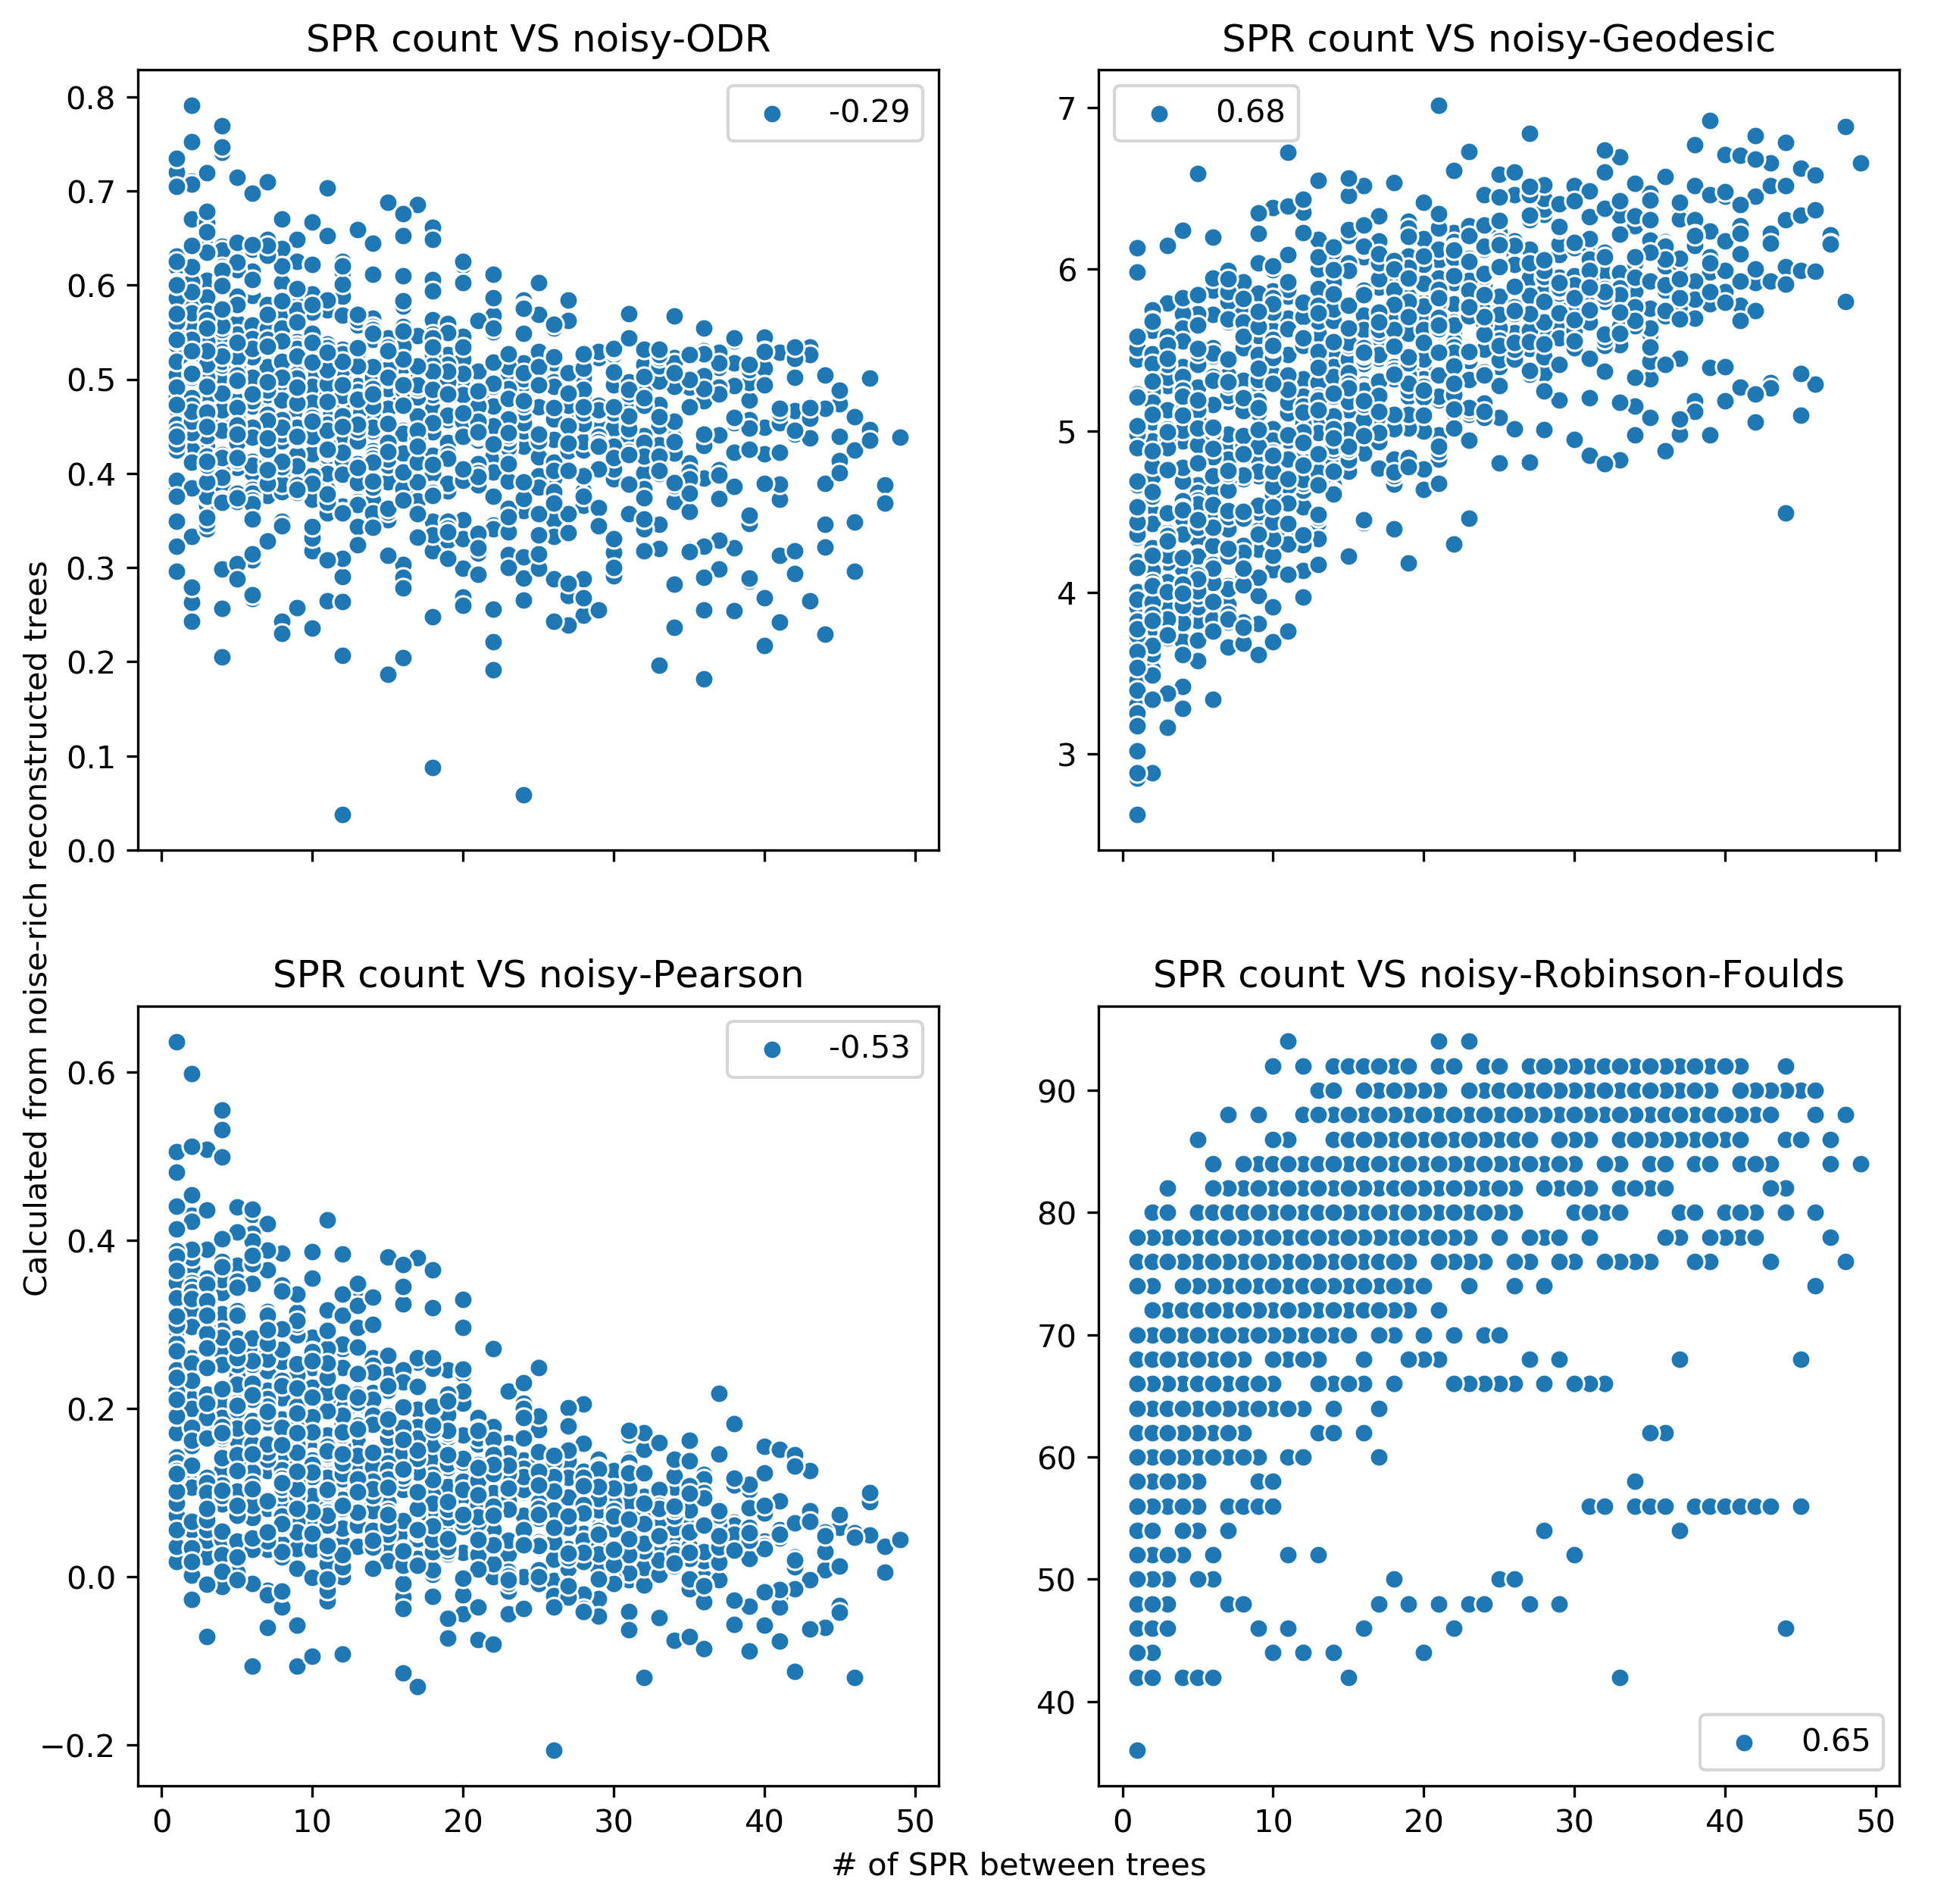

In [9]:
fig, axs = plt.subplots(sharex=True, ncols=2, nrows=2, dpi=300, figsize=(10, 10))

axs[0, 0].set_title('SPR count VS noisy-ODR')
sns.scatterplot(condensed_spr_distances,
                noisy_metrics['r2s'],
                ax=axs[0, 0],
                label=round(spearmanr(condensed_spr_distances, 
                                     noisy_metrics['r2s'])[0],
                            2)
)

axs[1, 0].set_title('SPR count VS noisy-Pearson')
sns.scatterplot(condensed_spr_distances,
                noisy_metrics['pearson'],
                ax=axs[1, 0],
                label=round(spearmanr(condensed_spr_distances, 
                                     noisy_metrics['pearson'])[0],
                            2)
)

axs[0, 1].set_title('SPR count VS noisy-Geodesic')
sns.scatterplot(condensed_spr_distances,
                condensed_noisy_geo,
                ax=axs[0, 1],
                label=round(spearmanr(condensed_spr_distances, 
                                     condensed_noisy_geo)[0],
                            2)
)

axs[1, 1].set_title('SPR count VS noisy-Robinson-Foulds')
sns.scatterplot(condensed_spr_distances,
                condensed_noisy_rf,
                ax=axs[1, 1],
                label=round(spearmanr(condensed_spr_distances, 
                                     condensed_noisy_rf)[0],
                            2)
)

fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel("# of SPR between trees")
plt.ylabel("Calculated from noise-rich reconstructed trees")

Text(0, 0.5, 'Calculated from the True simulated trees/matrices')

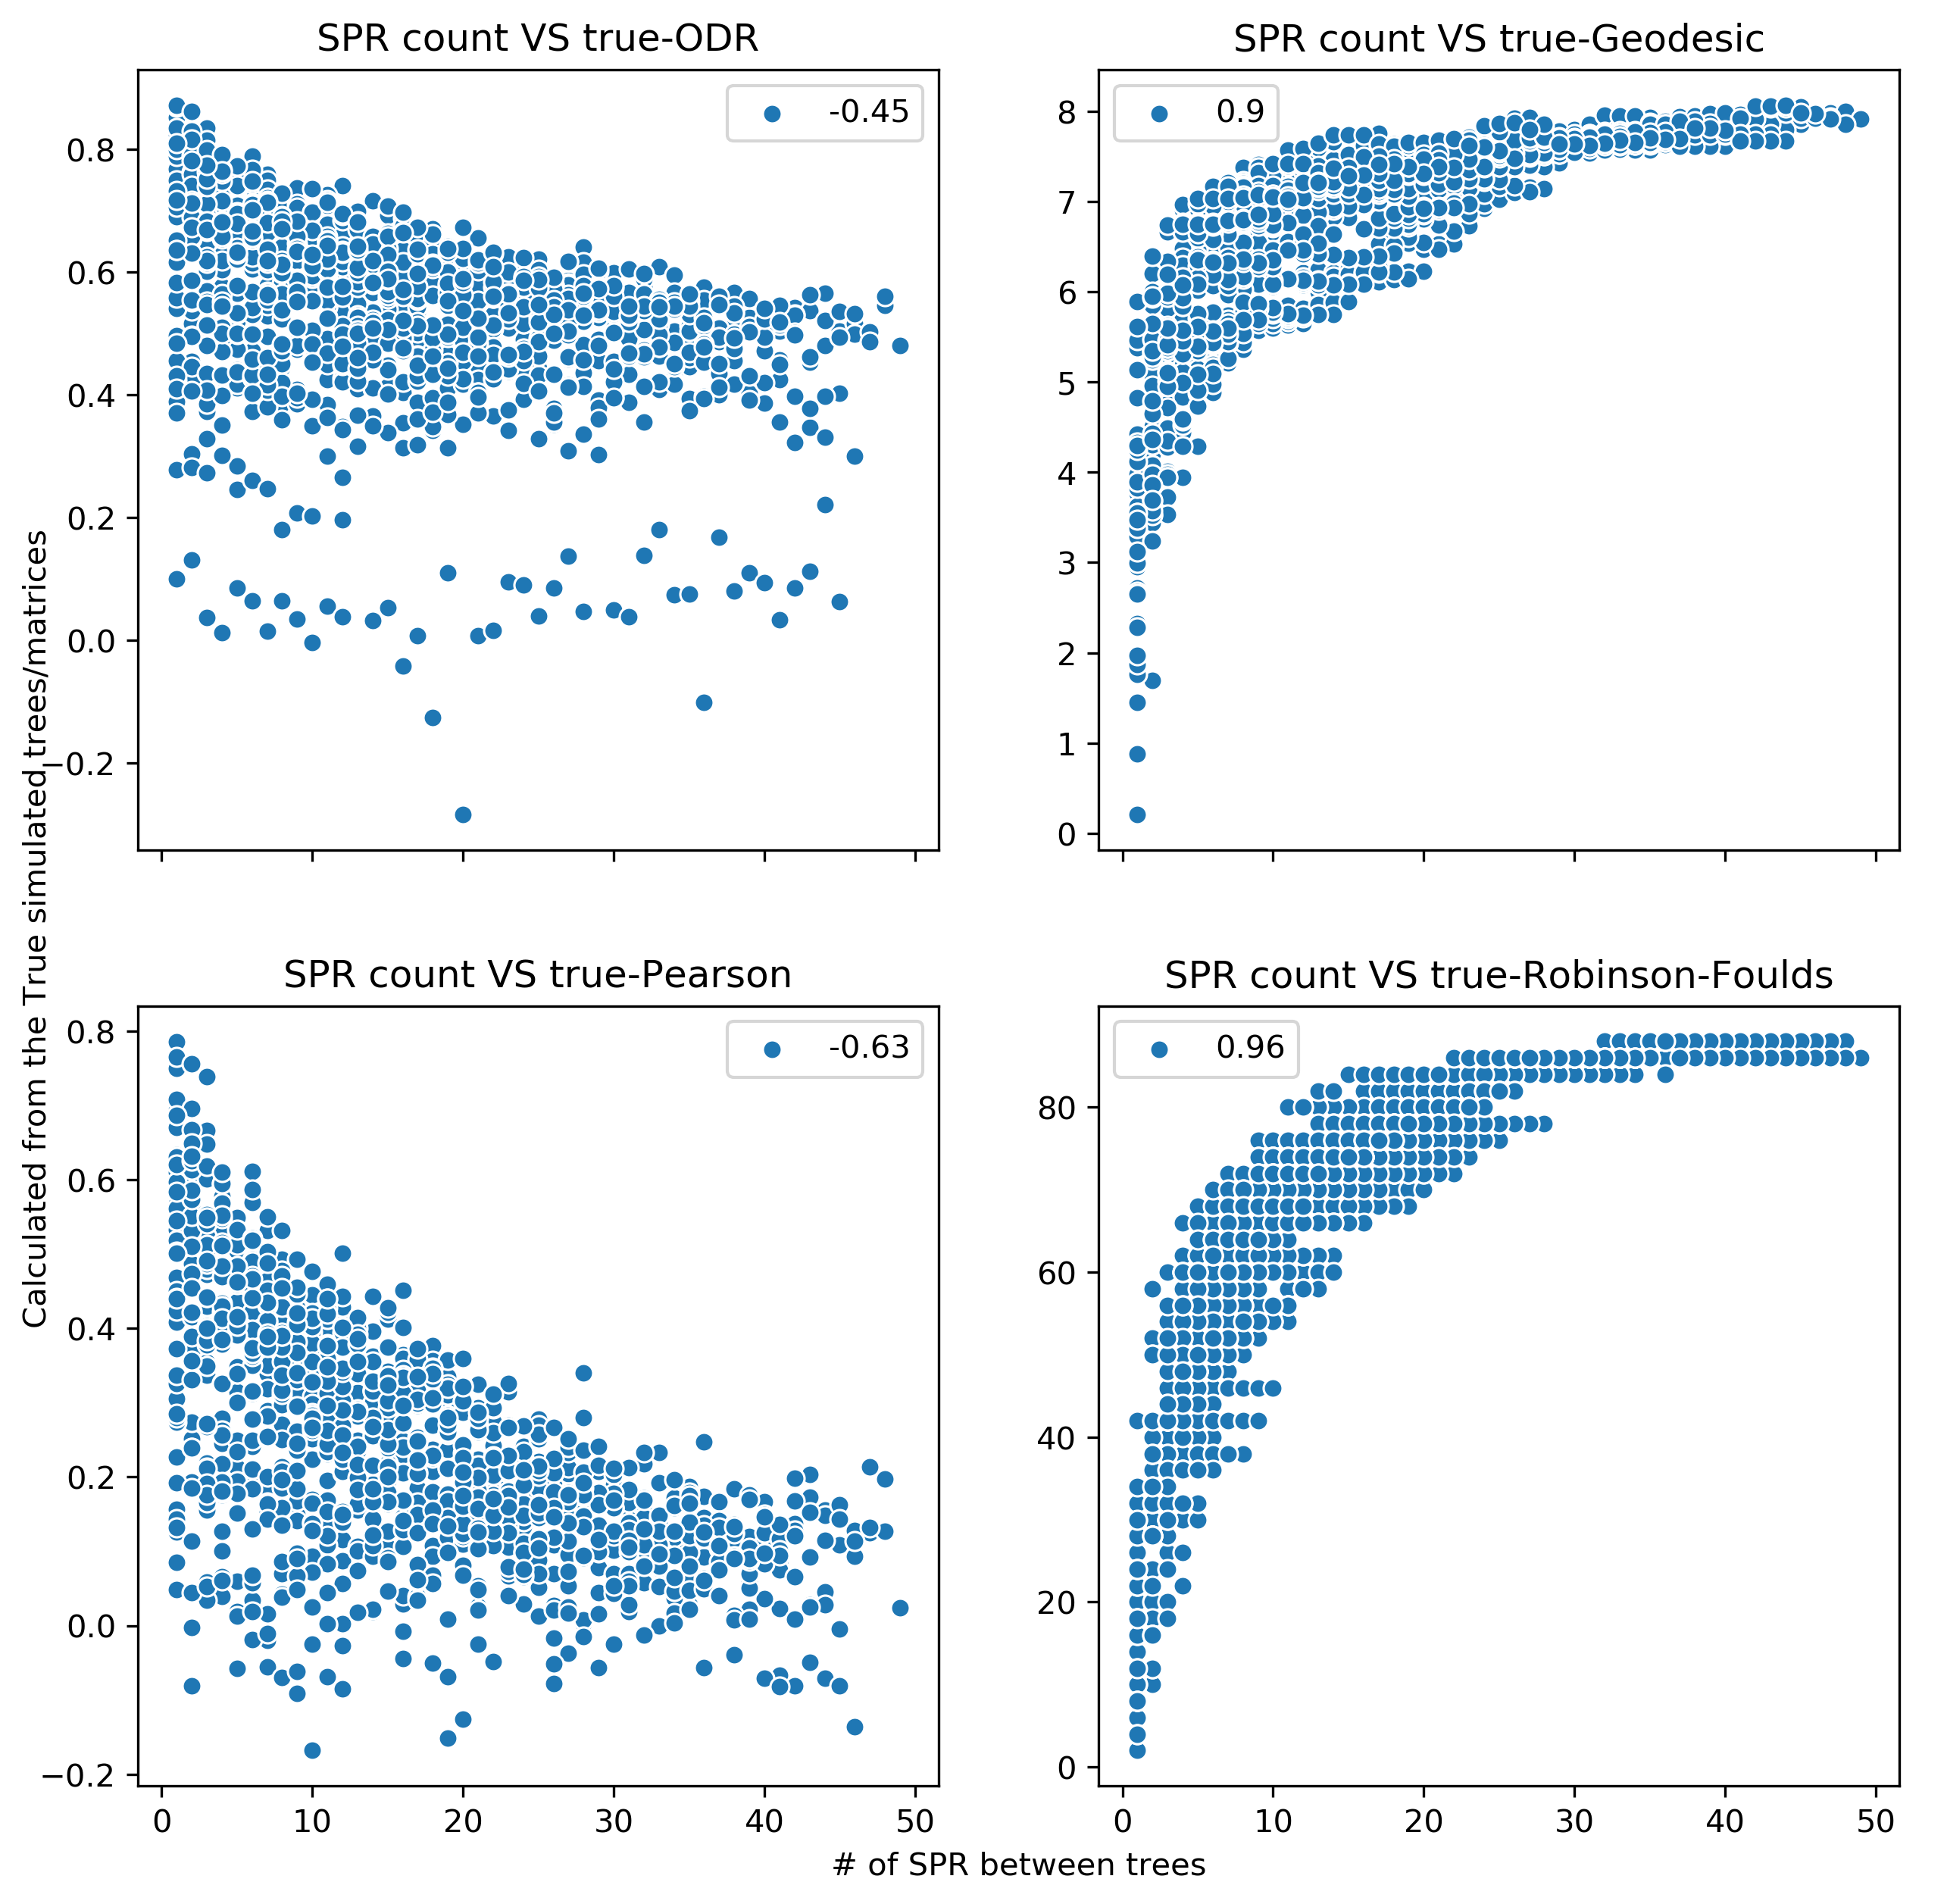

In [10]:
fig, axs = plt.subplots(sharex=True, ncols=2, nrows=2, dpi=300, figsize=(10, 10))

axs[0, 0].set_title('SPR count VS true-ODR')
sns.scatterplot(condensed_spr_distances,
                true_metrics['r2s'],
                ax=axs[0, 0],
                label=round(spearmanr(condensed_spr_distances, 
                                     true_metrics['r2s'])[0],
                            2)
)

axs[1, 0].set_title('SPR count VS true-Pearson')
sns.scatterplot(condensed_spr_distances,
                true_metrics['pearson'],
                ax=axs[1, 0],
                label=round(spearmanr(condensed_spr_distances, 
                                     true_metrics['pearson'])[0],
                            2)
)

axs[0, 1].set_title('SPR count VS true-Geodesic')
sns.scatterplot(condensed_spr_distances,
                condensed_true_geo,
                ax=axs[0, 1],
                label=round(spearmanr(condensed_spr_distances, 
                                     condensed_true_geo)[0],
                            2)
)

axs[1, 1].set_title('SPR count VS true-Robinson-Foulds')
sns.scatterplot(condensed_spr_distances,
                condensed_true_rf,
                ax=axs[1, 1],
                label=round(spearmanr(condensed_spr_distances, 
                                     condensed_true_rf)[0],
                            2)
)

fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel("# of SPR between trees")
plt.ylabel("Calculated from the True simulated trees/matrices")

Text(0, 0.5, 'Calculated from noise-rich reconstructed trees/matrices')

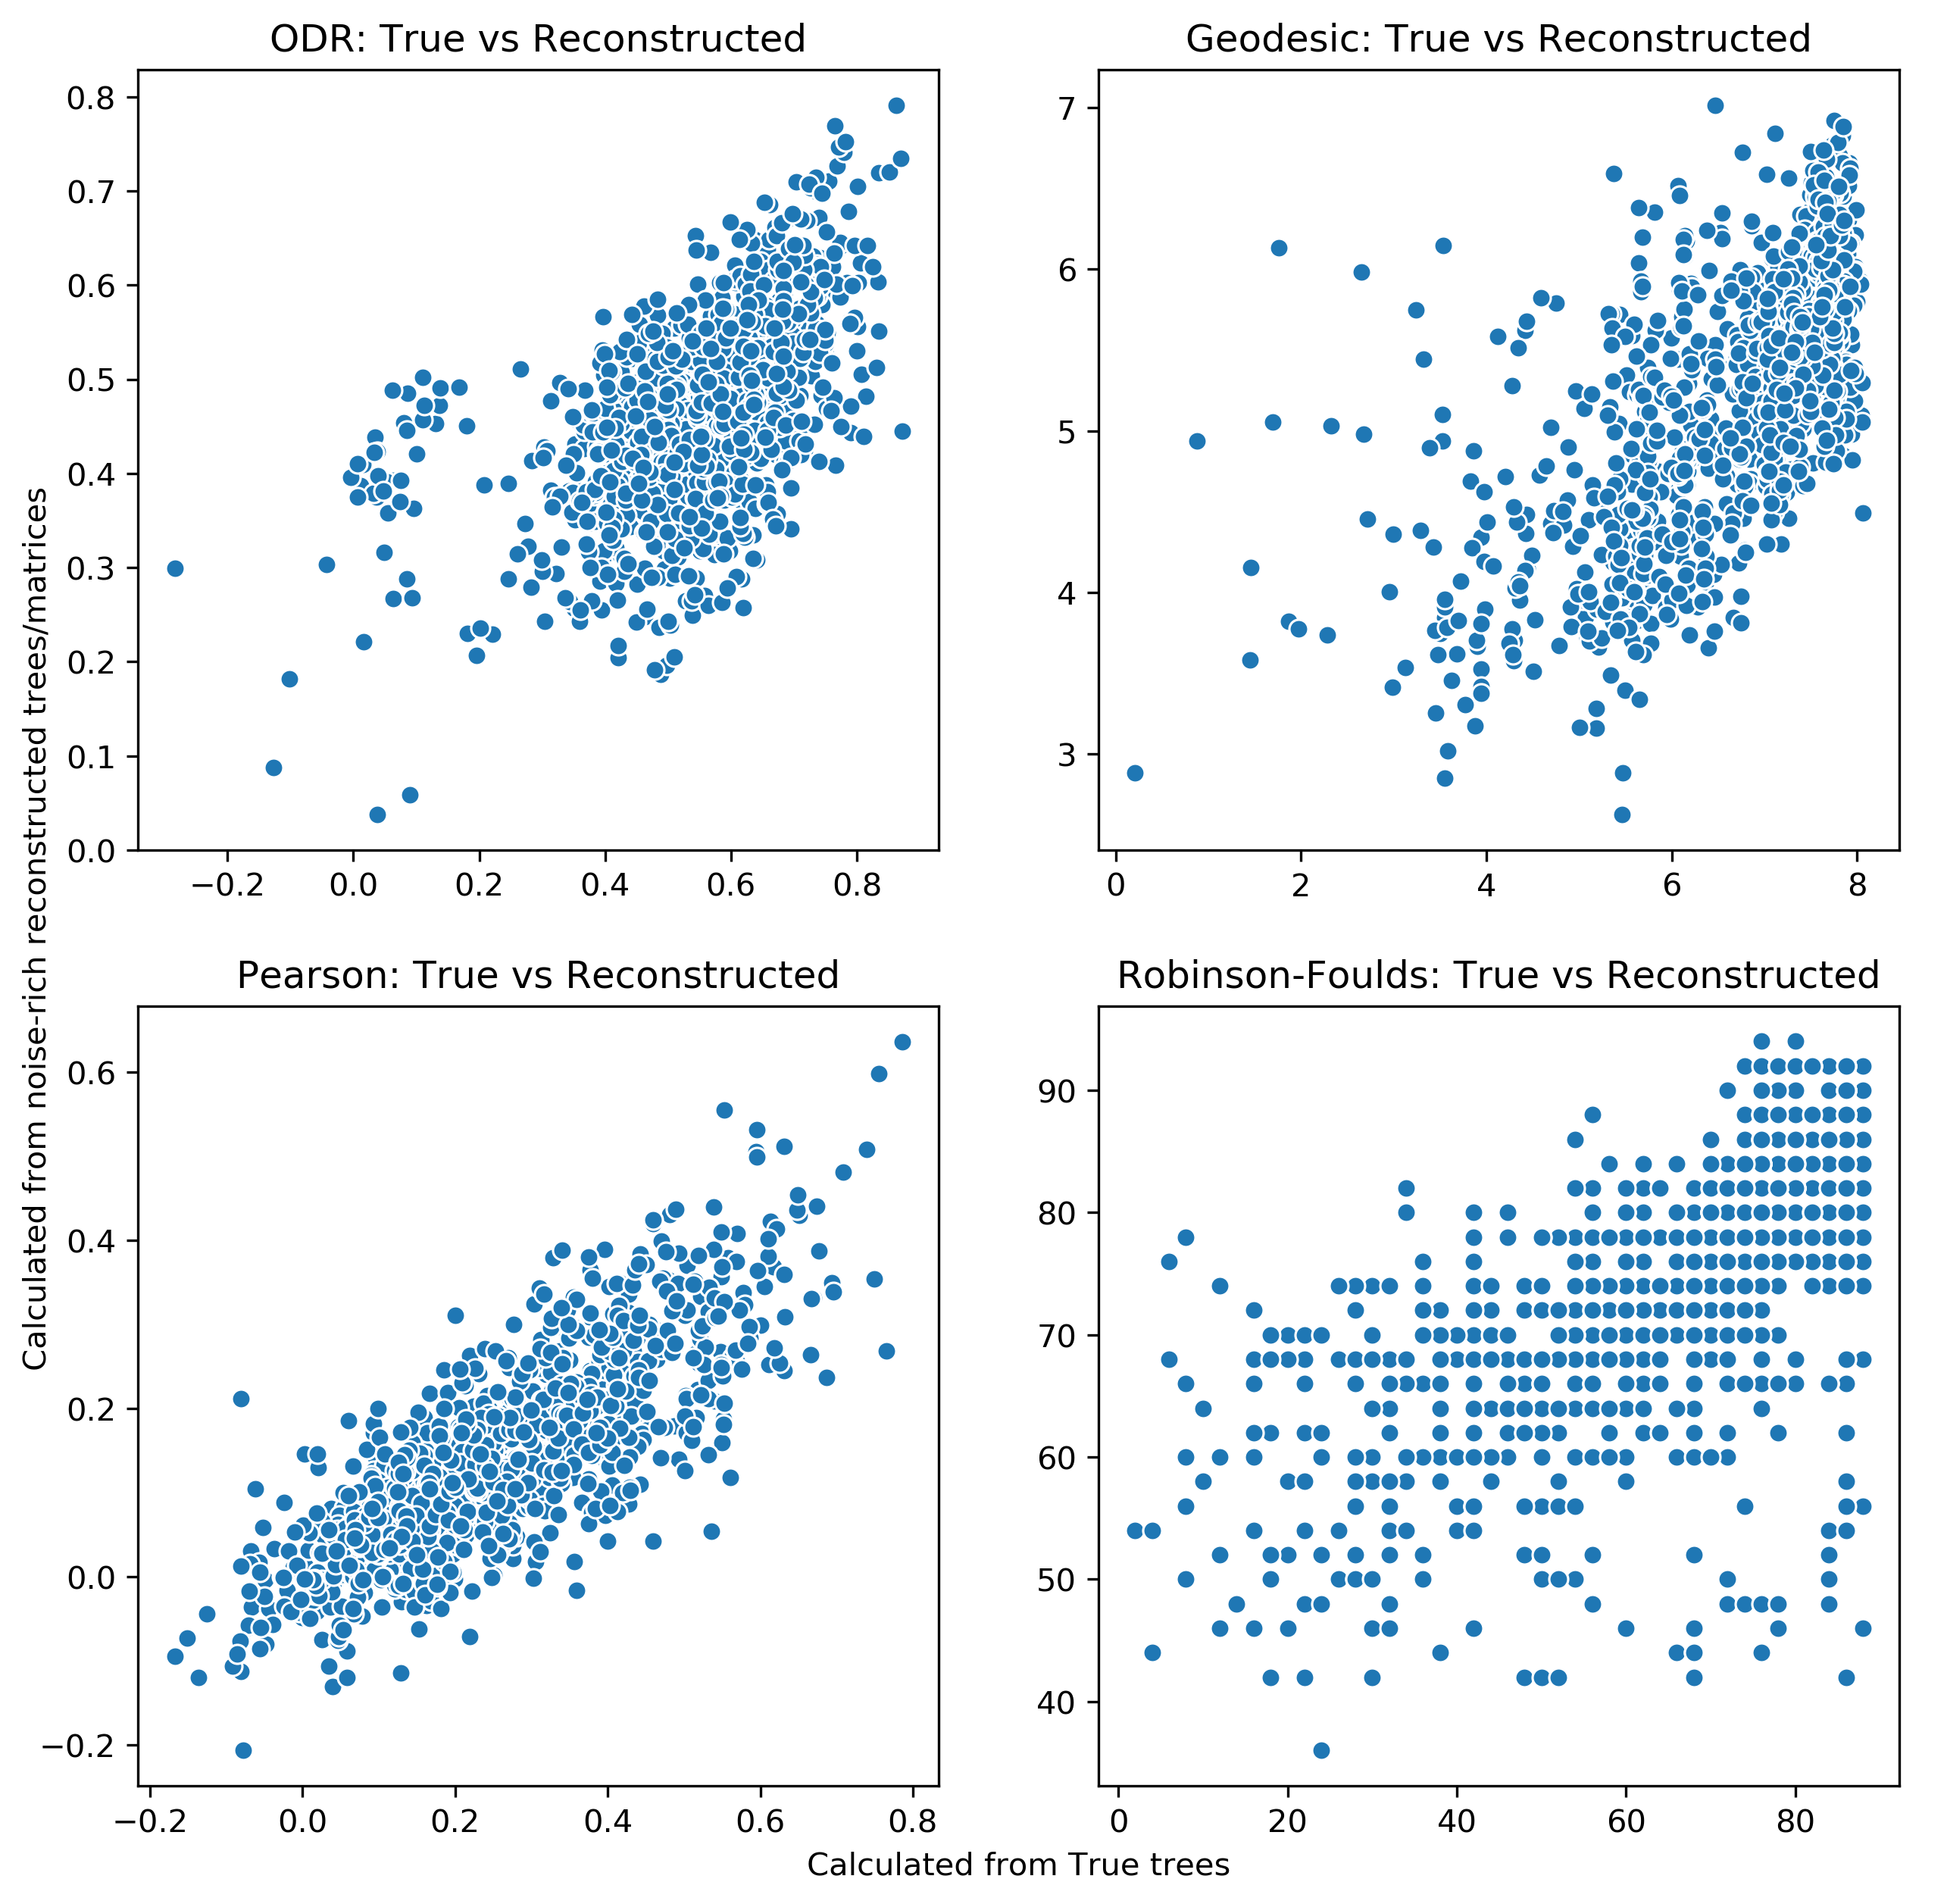

In [11]:
fig, axs = plt.subplots(ncols=2, nrows=2, dpi=300, figsize=(10, 10))

axs[0, 0].set_title('ODR: True vs Reconstructed')
sns.scatterplot(true_metrics['r2s'],
                noisy_metrics['r2s'],
                ax=axs[0, 0])

axs[1, 0].set_title('Pearson: True vs Reconstructed')
sns.scatterplot(true_metrics['pearson'],
                noisy_metrics['pearson'],
                ax=axs[1, 0])

axs[0, 1].set_title('Geodesic: True vs Reconstructed')
sns.scatterplot(condensed_true_geo,
                condensed_noisy_geo,
                ax=axs[0, 1])

axs[1, 1].set_title('Robinson-Foulds: True vs Reconstructed')
sns.scatterplot(condensed_true_rf,
                condensed_noisy_rf,
                ax=axs[1, 1])

fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel("Calculated from True trees")
plt.ylabel("Calculated from noise-rich reconstructed trees/matrices")

In [ ]:
matrix1, matrix2 = balance_matrices_no_genes(noisy_dist_matrices[1], noisy_dist_matrices[10])

condensed1 = squareform(matrix1.values, checks=False)
condensed2 = squareform(matrix2.values, checks=False)

odr_weights = estimate_weights(condensed1, condensed2)

regression = run_odr(condensed1, 
                     condensed2, 
                     *odr_weights)

mean_x = np.mean(condensed1)
mean_y = np.mean(condensed2)

sse = sum(regression.delta**2) + sum(regression.eps**2)
sst = sum((condensed1 - mean_x)**2)+\
      sum((condensed2 - mean_y)**2)

r2 = 1 - sse/sst

In [ ]:
r2

In [ ]:
sns.scatterplot(condensed1, condensed2)

In [ ]:
0.05/50

In [ ]:
noise_pearson_pval

In [ ]:
# pos = 10

for pos in range(0, 50):
    yeah = []
    hell = []
    foo  = []
    bar  = []
    pearson_pval = []
    noise_pearson_pval = []
    for n, m in zip(true_dist_matrices, noisy_dist_matrices):
        tmp_pearson = assess_coevolution(true_dist_matrices[pos], 
                                         n,
                                         pearson=True)
        yeah.append(tmp_pearson[0])
        pearson_pval.append(tmp_pearson[1])
        
        tmp_pearson = assess_coevolution(noisy_dist_matrices[pos], 
                                         n,
                                         pearson=True)
        hell.append(tmp_pearson[0])
        noise_pearson_pval.append(tmp_pearson[1])
        
        foo.append(assess_coevolution(true_dist_matrices[pos], 
                                      n,
                                      pearson=False)[1])
        bar.append(assess_coevolution(noisy_dist_matrices[pos], 
                                      m,
                                      pearson=False)[1])


    fig, axs = plt.subplots(figsize=(10, 7), ncols=2, nrows=2, dpi=300)
    sns.scatterplot(spr_distances.iloc[pos].values,
                    yeah, 
                    ax=axs[0, 0]);
    axs[0, 0].set_title('Pearson')
    sns.scatterplot(spr_distances.iloc[pos].values,
                    hell, 
                    ax=axs[1, 0]);
    axs[1, 0].set_title('noisy-Pearson')
    sns.scatterplot(spr_distances.iloc[pos].values,
                    foo, 
                    ax=axs[0, 1]);
    axs[0, 1].set_title('ODR')
    sns.scatterplot(spr_distances.iloc[pos].values,
                    bar, 
                    ax=axs[1, 1]);
    axs[1, 1].set_title('noisy-ODR');
    
    fig.tight_layout()
    fig.savefig(f'odrVSpearson/tree{pos}_VS_all.png')
    break